In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("GBvideos.csv")

In [3]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                38916 non-null  object
 1   trending_date           38916 non-null  object
 2   title                   38916 non-null  object
 3   channel_title           38916 non-null  object
 4   category_id             38916 non-null  int64 
 5   publish_time            38916 non-null  object
 6   tags                    38916 non-null  object
 7   views                   38916 non-null  int64 
 8   likes                   38916 non-null  int64 
 9   dislikes                38916 non-null  int64 
 10  comment_count           38916 non-null  int64 
 11  thumbnail_link          38916 non-null  object
 12  comments_disabled       38916 non-null  bool  
 13  ratings_disabled        38916 non-null  bool  
 14  video_error_or_removed  38916 non-null  bool  
 15  de

In [5]:
df.shape

(38916, 16)

In [6]:
df.drop(columns=["video_id", "thumbnail_link"], inplace=True)

In [7]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,38916.000000,3.891600e+04,3.891600e+04,3.891600e+04,3.891600e+04
mean,16.827937,5.911944e+06,1.345196e+05,7.612560e+03,1.308835e+04
std,7.752728,1.900121e+07,3.499893e+05,5.095683e+04,5.066740e+04
min,1.000000,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,10.000000,2.515272e+05,5.897000e+03,2.000000e+02,6.790000e+02
50%,20.000000,9.818890e+05,2.518250e+04,8.210000e+02,2.478000e+03
75%,24.000000,3.683628e+06,1.140892e+05,3.357500e+03,9.241500e+03
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


<AxesSubplot:>

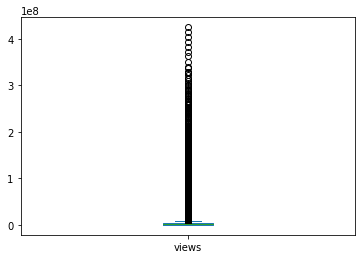

In [8]:
df["views"].sort_values().plot(kind="box")

Text(0.5, 1.0, 'Likes vs. Views')

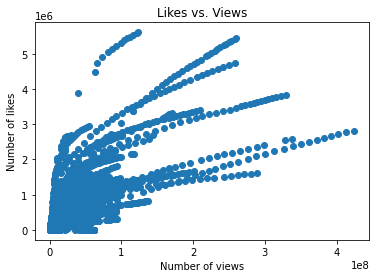

In [9]:
plt.scatter(x=df["views"], y=df["likes"])
plt.xlabel("Number of views")
plt.ylabel("Number of likes")
plt.title("Likes vs. Views")

Text(0.5, 1.0, 'Likes vs. Dislikes')

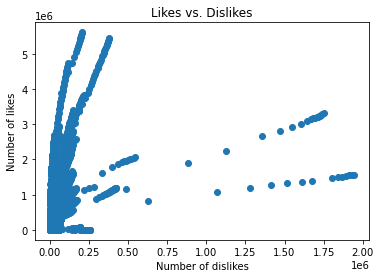

In [10]:
plt.scatter(x=df["dislikes"], y=df["likes"])
plt.xlabel("Number of dislikes")
plt.ylabel("Number of likes")
plt.title("Likes vs. Dislikes")

## What 10 channels had the highest views during the timeframe of our data?

In [11]:
df1 = df.sort_values("views", ascending=False)[["channel_title", "views"]]

In [12]:
df1

,channel_title,views
28412,NickyJamTV,424538912
28212,NickyJamTV,413586699
28008,NickyJamTV,402650804
27811,NickyJamTV,392036878
27615,NickyJamTV,382401497
...,...,...
4342,That's Surrey TV,972
4113,That's Surrey TV,937
3908,That's Surrey TV,922
3701,That's Surrey TV,890


In [13]:
pd.pivot_table(df1, values="views", index="channel_title", aggfunc="sum").sort_values("views", ascending=False).head(10)

,views
channel_title,
NickyJamTV,8516190092
Ozuna,8305198063
Bad Bunny,6891280759
DrakeVEVO,6581834413
ChildishGambinoVEVO,6101309613
Flow La Movie,5151438858
ArianaGrandeVevo,4107436350
Marvel Entertainment,3993421220
jypentertainment,3624070589


In [14]:
df1

,channel_title,views
28412,NickyJamTV,424538912
28212,NickyJamTV,413586699
28008,NickyJamTV,402650804
27811,NickyJamTV,392036878
27615,NickyJamTV,382401497
...,...,...
4342,That's Surrey TV,972
4113,That's Surrey TV,937
3908,That's Surrey TV,922
3701,That's Surrey TV,890


## At what time of the day were most popular videos published?

In [15]:
df["publish_time"] = pd.to_datetime(df["publish_time"])

In [16]:
df["trending_date"].head()

0    17.14.11
1    17.14.11
2    17.14.11
3    17.14.11
4    17.14.11
Name: trending_date, dtype: object

In [17]:
new_date = pd.to_datetime(df["trending_date"], format="%y.%d.%m")

In [18]:
df["trending_date"] = new_date

In [19]:
df["publish_time"].dt.time

0        07:38:29
1        06:24:44
2        17:00:03
3        02:30:38
4        01:45:13
           ...   
38911    07:00:01
38912    17:09:16
38913    11:05:08
38914    20:32:32
38915    04:06:35
Name: publish_time, Length: 38916, dtype: object

In [20]:
df2 = pd.pivot_table(df, values="views", index="channel_title").sort_values("views", ascending=False).head(10)

Text(0.5, 0, 'Views')

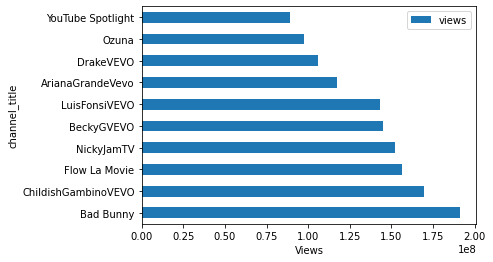

In [21]:
df2.plot(kind="barh")
plt.xlabel("Views")

Text(0.5, 0, 'Views')

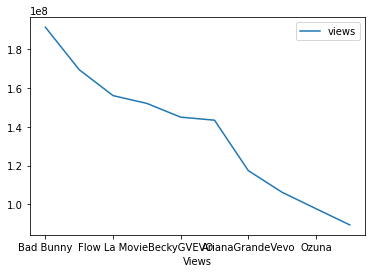

In [22]:
df2.plot(kind="line")
plt.xlabel("Views")

In [23]:
import json

In [24]:
with open (r'C:\Users\User\Desktop\7th Cohort\GB_category_id.json') as json_file:
    items = json.load(json_file)['items']
cat_dict={}
for item in items:
    cat_dict[int(item['id'])]= item['snippet']['title']

In [25]:
df['category_name'] = df['category_id'].map(cat_dict)

In [26]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10 07:38:29+00:00,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,False,False,False,Click here to continue the story and make your...,Howto & Style
1,2017-11-14,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12 06:24:44+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,False,False,False,Musical guest Taylor Swift performs …Ready for...,Entertainment
2,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
3,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13 02:30:38+00:00,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Sports
4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13 01:45:13+00:00,[none],9815,30,2,30,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics


In [27]:
df_cat=pd.pivot_table(df,values='views', index='category_name').sort_values('views')

In [28]:
import seaborn as sns

<AxesSubplot:ylabel='category_name'>

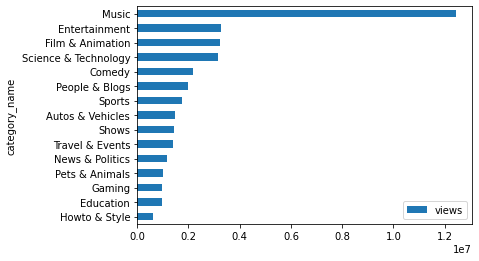

In [29]:
df_cat.plot(kind='barh')

In [30]:
df[df['channel_title']=='YouTube Spotlight']

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
61,2017-11-14,#VeteransDay: Thank You for Everything,YouTube Spotlight,24,2017-11-10 15:07:13+00:00,"vets|""veterans day""|""veterans""|""youtube""|""vete...",812516,26917,1979,4998,False,False,False,"This #VeteransDay, we want to say thank you to...",Entertainment
280,2017-11-15,#VeteransDay: Thank You for Everything,YouTube Spotlight,24,2017-11-10 15:07:13+00:00,"vets|""veterans day""|""veterans""|""youtube""|""vete...",835573,27068,2021,5165,False,False,False,"This #VeteransDay, we want to say thank you to...",Entertainment
498,2017-11-16,#VeteransDay: Thank You for Everything,YouTube Spotlight,24,2017-11-10 15:07:13+00:00,"vets|""veterans day""|""veterans""|""youtube""|""vete...",849499,27121,2042,5181,False,False,False,"This #VeteransDay, we want to say thank you to...",Entertainment
737,2017-11-17,#VeteransDay: Thank You for Everything,YouTube Spotlight,24,2017-11-10 15:07:13+00:00,"vets|""veterans day""|""veterans""|""youtube""|""vete...",862318,27208,2068,5276,False,False,False,"This #VeteransDay, we want to say thank you to...",Entertainment
951,2017-11-18,#VeteransDay: Thank You for Everything,YouTube Spotlight,24,2017-11-10 15:07:13+00:00,"vets|""veterans day""|""veterans""|""youtube""|""vete...",880510,27270,2091,5285,False,False,False,"This #VeteransDay, we want to say thank you to...",Entertainment
1161,2017-11-19,#VeteransDay: Thank You for Everything,YouTube Spotlight,24,2017-11-10 15:07:13+00:00,"vets|""veterans day""|""veterans""|""youtube""|""vete...",894216,27317,2112,5295,False,False,False,"This #VeteransDay, we want to say thank you to...",Entertainment
1368,2017-11-20,#VeteransDay: Thank You for Everything,YouTube Spotlight,24,2017-11-10 15:07:13+00:00,"vets|""veterans day""|""veterans""|""youtube""|""vete...",906200,27360,2134,5297,False,False,False,"This #VeteransDay, we want to say thank you to...",Entertainment
1582,2017-11-21,#VeteransDay: Thank You for Everything,YouTube Spotlight,24,2017-11-10 15:07:13+00:00,"vets|""veterans day""|""veterans""|""youtube""|""vete...",913152,27386,2147,5294,False,False,False,"This #VeteransDay, we want to say thank you to...",Entertainment
1791,2017-11-22,#VeteransDay: Thank You for Everything,YouTube Spotlight,24,2017-11-10 15:07:13+00:00,"vets|""veterans day""|""veterans""|""youtube""|""vete...",916104,27405,2153,5292,False,False,False,"This #VeteransDay, we want to say thank you to...",Entertainment
4593,2017-12-07,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51+00:00,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",24784863,1149190,483926,462108,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Entertainment


In [31]:
df_time=df[['publish_time','views']]
df_time

,publish_time,views
0,2017-11-10 07:38:29+00:00,7224515
1,2017-11-12 06:24:44+00:00,1053632
2,2017-11-10 17:00:03+00:00,17158579
3,2017-11-13 02:30:38+00:00,27833
4,2017-11-13 01:45:13+00:00,9815
...,...,...
38911,2018-05-09 07:00:01+00:00,25066952
38912,2018-05-11 17:09:16+00:00,1492219
38913,2018-05-08 11:05:08+00:00,29641412
38914,2018-05-08 20:32:32+00:00,14317515


## what time of the day were most popular video published

In [32]:
df['publish_time']=pd.to_datetime(df['publish_time'])

In [33]:
df_time = df[["publish_time", "views"]]

In [34]:
df_time['publish_time']=df['publish_time'].dt.time
df_time.head()

C:\Users\User\AppData\Local\Temp\ipykernel_5924\1936357887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['publish_time']=df['publish_time'].dt.time


,publish_time,views
0,07:38:29,7224515
1,06:24:44,1053632
2,17:00:03,17158579
3,02:30:38,27833
4,01:45:13,9815


In [35]:
df_time["publish_time"].astype(str).str.split(":", expand=True)[0]

0        07
1        06
2        17
3        02
4        01
         ..
38911    07
38912    17
38913    11
38914    20
38915    04
Name: 0, Length: 38916, dtype: object

In [36]:
df_time.insert(1, "hour", df_time["publish_time"].astype(str).str.split(":", expand=True)[0])

In [37]:
df_time.tail()

,publish_time,hour,views
38911,07:00:01,07,25066952
38912,17:09:16,17,1492219
38913,11:05:08,11,29641412
38914,20:32:32,20,14317515
38915,04:06:35,04,607552


In [38]:
df_time = df_time[["views", "publish_time", "hour"]]

In [39]:
df_time.tail()

,views,publish_time,hour
38911,25066952,07:00:01,07
38912,1492219,17:09:16,17
38913,29641412,11:05:08,11
38914,14317515,20:32:32,20
38915,607552,04:06:35,04


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


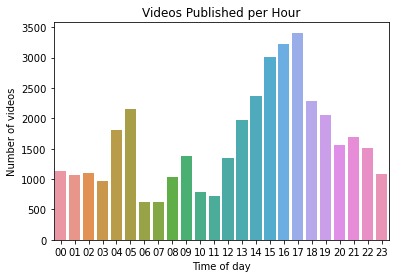

In [40]:
sns.countplot(df_time.sort_values("hour")["hour"])
plt.ylabel("Number of videos")
plt.xlabel("Time of day")
plt.title("Videos Published per Hour")
plt.show()

In [41]:
 views_per_hour = pd.pivot_table(df_time, index="hour", values="views")
views_per_hour.head()

,views
hour,
00,9.039660e+06
01,5.259995e+06
02,4.177267e+06
03,4.370840e+06
04,1.431834e+07


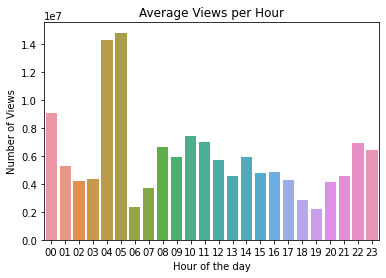

In [42]:
sns.barplot(data= views_per_hour, x=views_per_hour.index, y="views")
plt.title("Average Views per Hour")
plt.xlabel("Hour of the day")
plt.ylabel("Number of Views");

In [43]:
views_per_hour = pd.pivot_table(df_time, index="hour", values="views", aggfunc="sum")

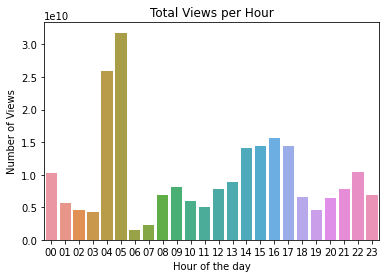

In [44]:
sns.barplot(data= views_per_hour, x=views_per_hour.index, y="views")
plt.title("Total Views per Hour")
plt.xlabel("Hour of the day")
plt.ylabel("Number of Views");

## What day of the week were most popular videos published?

In [45]:
df_day = df[["publish_time", "views"]]

In [46]:
df_day.head()

,publish_time,views
0,2017-11-10 07:38:29+00:00,7224515
1,2017-11-12 06:24:44+00:00,1053632
2,2017-11-10 17:00:03+00:00,17158579
3,2017-11-13 02:30:38+00:00,27833
4,2017-11-13 01:45:13+00:00,9815


In [47]:
df_day["day"] = df_day["publish_time"].dt.day_name()

C:\Users\User\AppData\Local\Temp\ipykernel_5924\1279676249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day["day"] = df_day["publish_time"].dt.day_name()


<AxesSubplot:xlabel='day', ylabel='count'>

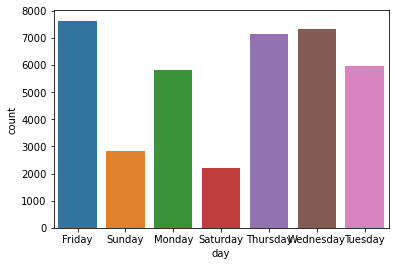

In [48]:
sns.countplot(data=df_day, x="day")

In [49]:
day_pivot = pd.pivot_table(df_day, index="day", values="views", aggfunc="mean")

In [50]:
day_pivot.head()

,views
day,
Friday,9.169604e+06
Monday,4.023096e+06
Saturday,4.766266e+06
Sunday,6.915152e+06
Thursday,6.458100e+06


In [51]:
daylist = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

In [52]:
day_pivot.loc["Friday"]

views    9.169604e+06
Name: Friday, dtype: float64

In [53]:
day_pivot = day_pivot.loc[daylist]

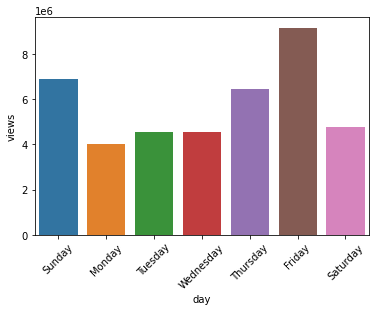

In [54]:
sns.barplot(data=day_pivot, x=day_pivot.index, y="views")
plt.xticks(rotation = 45);

## What video categories had the highest likes, dislikes and comments (engagement)?

In [55]:
df_engagement = df[["likes", "dislikes", "comment_count", "views", "category_name"]]

In [56]:
df_engagement["like_rate"] = df_engagement["likes"] / df_engagement["views"] * 100
df_engagement["dislike_rate"] = df_engagement["dislikes"] / df_engagement["views"] * 100
df_engagement["comment_rate"] = df_engagement["comment_count"] / df_engagement["views"] * 100

C:\Users\User\AppData\Local\Temp\ipykernel_5924\1591131287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_engagement["like_rate"] = df_engagement["likes"] / df_engagement["views"] * 100
C:\Users\User\AppData\Local\Temp\ipykernel_5924\1591131287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_engagement["dislike_rate"] = df_engagement["dislikes"] / df_engagement["views"] * 100
C:\Users\User\AppData\Local\Temp\ipykernel_5924\1591131287.py:3: SettingWithCopyWarning: 
A value is trying to be set 

In [57]:
df_engagement.head()

,likes,dislikes,comment_count,views,category_name,like_rate,dislike_rate,comment_rate
0,55681,10247,9479,7224515,Howto & Style,0.770723,0.141837,0.131206
1,25561,2294,2757,1053632,Entertainment,2.425989,0.217723,0.261666
2,787420,43420,125882,17158579,Music,4.589075,0.253051,0.733639
3,193,12,37,27833,Sports,0.693421,0.043114,0.132936
4,30,2,30,9815,News & Politics,0.305655,0.020377,0.305655


In [58]:
df_engagement["engagement_rate"] = (df_engagement["likes"] + df_engagement["dislikes"] + df_engagement["comment_count"]) / df["views"] * 100

C:\Users\User\AppData\Local\Temp\ipykernel_5924\3333752666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_engagement["engagement_rate"] = (df_engagement["likes"] + df_engagement["dislikes"] + df_engagement["comment_count"]) / df["views"] * 100


<AxesSubplot:xlabel='likes', ylabel='dislikes'>

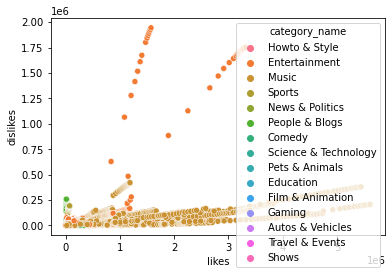

In [59]:
sns.scatterplot(data=df_engagement, x="likes", y="dislikes", hue="category_name")

In [60]:
engagement_pivot = pd.pivot_table(df_engagement, 
                                  index="category_name", 
                                  values=["like_rate", "dislike_rate", "comment_rate"], 
                                  aggfunc="mean")

In [61]:
engagement_pivot.head()

,comment_rate,dislike_rate,like_rate
category_name,,,
Autos & Vehicles,0.446242,0.123126,1.862653
Comedy,0.460723,0.139240,3.641234
Education,0.671717,0.237816,3.860426
Entertainment,0.461837,0.164820,3.020228
Film & Animation,0.418202,0.173333,2.687487


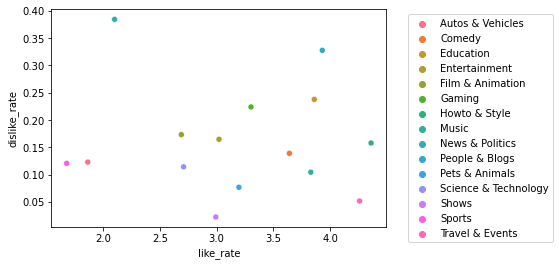

In [62]:
sns.scatterplot(data=engagement_pivot, x="like_rate", y="dislike_rate", hue=engagement_pivot.index)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

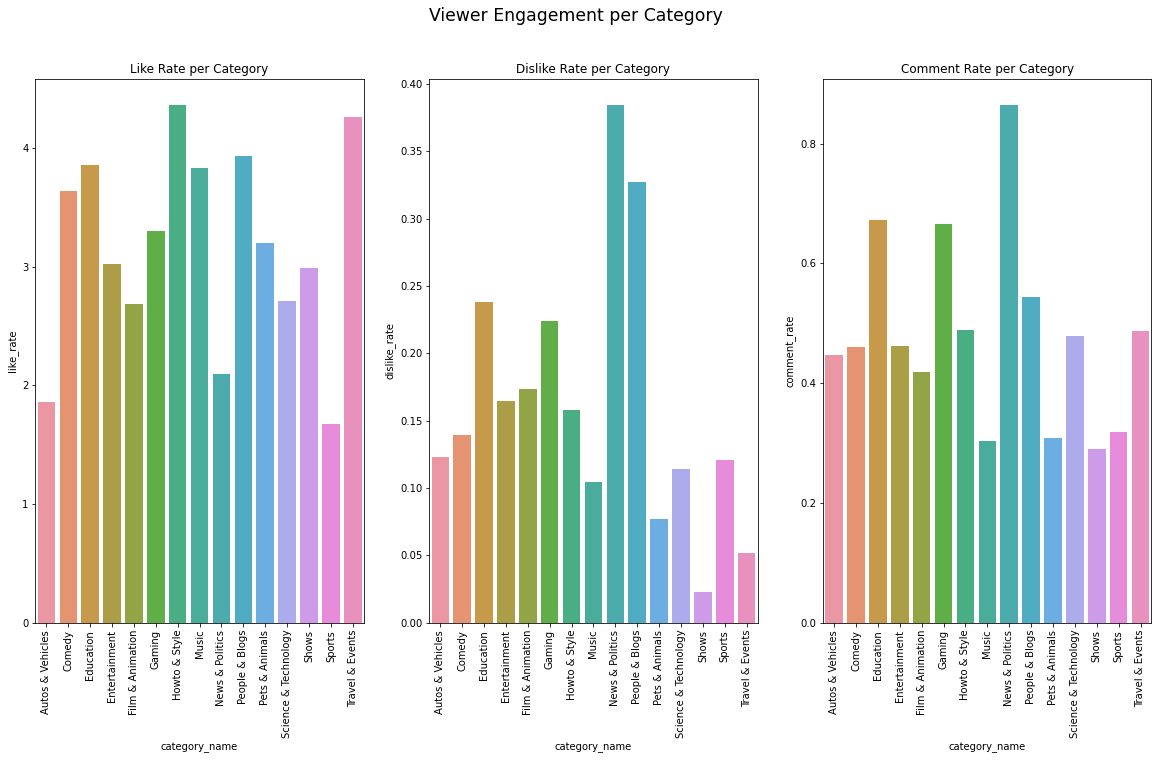

In [63]:
# from matplotlib.figure import AxesStack
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle("Viewer Engagement per Category", fontsize="xx-large")

sns.barplot(ax=axes[0], x=engagement_pivot.index, y="like_rate", data=engagement_pivot)
axes[0].set_title("Like Rate per Category")

sns.barplot(ax=axes[1], x=engagement_pivot.index, y="dislike_rate", data=engagement_pivot)
axes[1].set_title("Dislike Rate per Category")

sns.barplot(ax=axes[2], x=engagement_pivot.index, y="comment_rate", data=engagement_pivot)
axes[2].set_title("Comment Rate per Category")


for ax in axes:
  ax.tick_params(axis="x", rotation=90)
  
plt.show()

In [64]:
engagement_pivot["engagement"] = engagement_pivot["dislike_rate"] + engagement_pivot["like_rate"] + engagement_pivot["comment_rate"]
engagement_pivot.head()

,comment_rate,dislike_rate,like_rate,engagement
category_name,,,,
Autos & Vehicles,0.446242,0.123126,1.862653,2.432021
Comedy,0.460723,0.139240,3.641234,4.241196
Education,0.671717,0.237816,3.860426,4.769959
Entertainment,0.461837,0.164820,3.020228,3.646886
Film & Animation,0.418202,0.173333,2.687487,3.279022


In [65]:
engagement_pivot.sort_values("engagement", inplace=True, ascending=False)

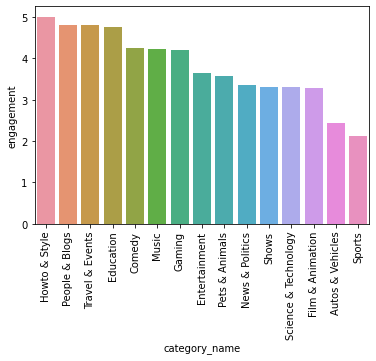

In [66]:
sns.barplot(x=engagement_pivot.index, y="engagement", data=engagement_pivot)
plt.xticks(rotation=90)
plt.show()

## What 50 channels have the highest number of popular videos and what category does most of their videos fall into?

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52992 (\N{HANGUL SYLLABLE KE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


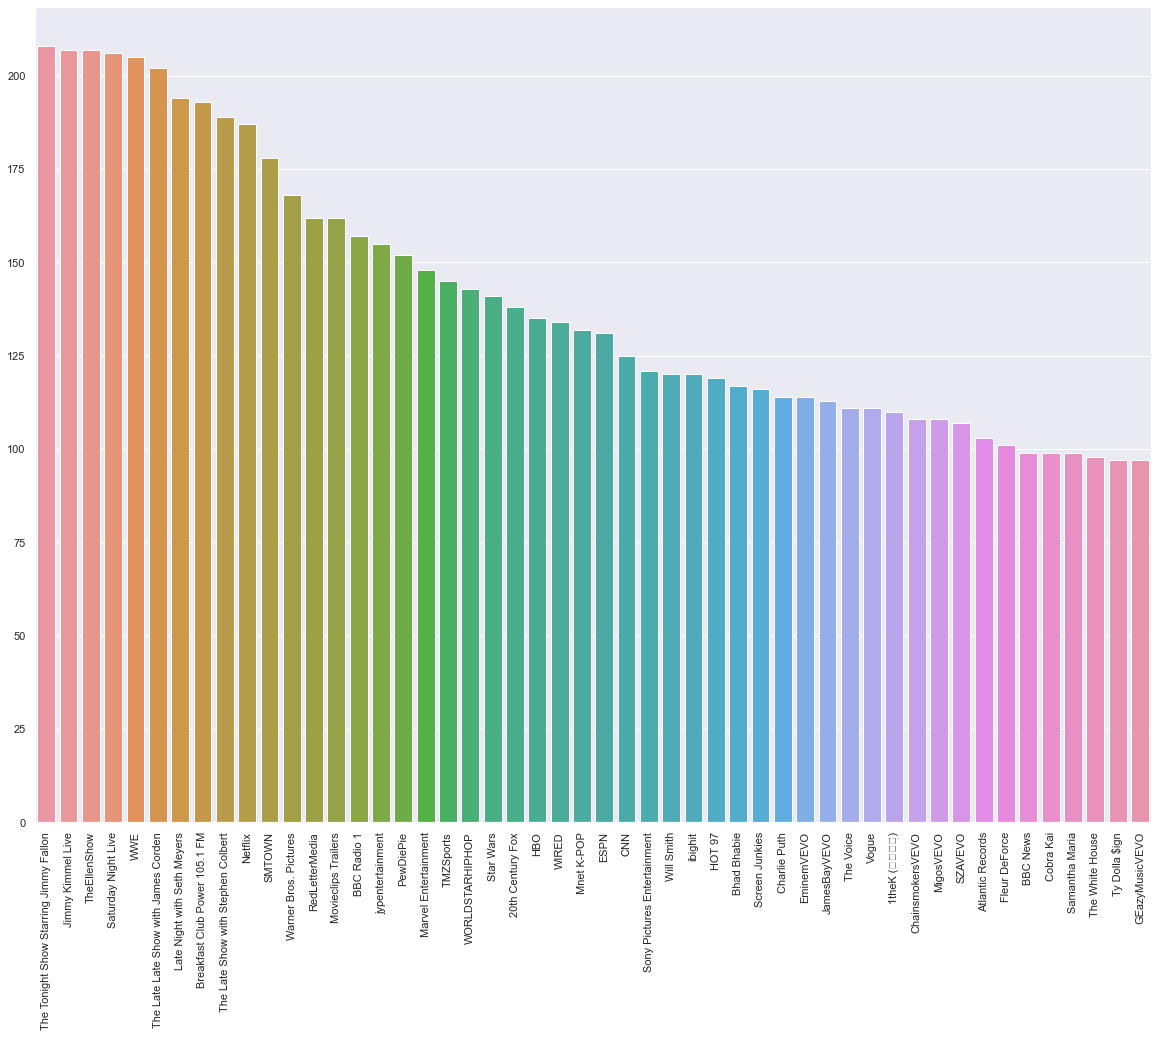

In [87]:
count_series = df["channel_title"].value_counts().head(50)
sns.barplot(x=count_series.index, y=count_series.values)
sns.set(rc={'figure.figsize':(20,20)})
plt.xticks(rotation=90)
plt.show();

In [68]:
#turn count_series into a dataframe
count_df = pd.DataFrame(count_series).reset_index()
count_df.columns = ["channel_title", "counts"]
count_df

,channel_title,counts
0,The Tonight Show Starring Jimmy Fallon,208
1,Jimmy Kimmel Live,207
2,TheEllenShow,207
3,Saturday Night Live,206
4,WWE,205
5,The Late Late Show with James Corden,202
6,Late Night with Seth Meyers,194
7,Breakfast Club Power 105.1 FM,193
8,The Late Show with Stephen Colbert,189
9,Netflix,187


In [69]:
df_channels = df[["category_name", "views", "channel_title"]]
df_channels

,category_name,views,channel_title
0,Howto & Style,7224515,John Lewis
1,Entertainment,1053632,Saturday Night Live
2,Music,17158579,EminemVEVO
3,Sports,27833,Salford City Football Club
4,News & Politics,9815,Cute Girl Videos
...,...,...,...
38911,Music,25066952,EnriqueIglesiasVEVO
38912,Music,1492219,Jacob Sartorius
38913,Music,29641412,Anne-Marie
38914,Entertainment,14317515,Eurovision Song Contest


## Join Two Tables (Left)

In [70]:
merged_df = pd.merge(count_df, df_channels, how="left", on=["channel_title", "channel_title"]).drop(columns=["views", "counts"])
merged_df

,channel_title,category_name
0,The Tonight Show Starring Jimmy Fallon,Comedy
1,The Tonight Show Starring Jimmy Fallon,Comedy
2,The Tonight Show Starring Jimmy Fallon,Comedy
3,The Tonight Show Starring Jimmy Fallon,Comedy
4,The Tonight Show Starring Jimmy Fallon,Comedy
...,...,...
7001,GEazyMusicVEVO,Music
7002,GEazyMusicVEVO,Music
7003,GEazyMusicVEVO,Music
7004,GEazyMusicVEVO,Music


In [71]:
merged_df.drop_duplicates(subset=['channel_title', 'category_name'])

,channel_title,category_name
0,The Tonight Show Starring Jimmy Fallon,Comedy
208,Jimmy Kimmel Live,Comedy
224,Jimmy Kimmel Live,Entertainment
225,Jimmy Kimmel Live,Music
415,TheEllenShow,Entertainment
...,...,...
6536,Cobra Kai,People & Blogs
6615,Samantha Maria,Howto & Style
6714,The White House,News & Politics
6812,Ty Dolla $ign,Music


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


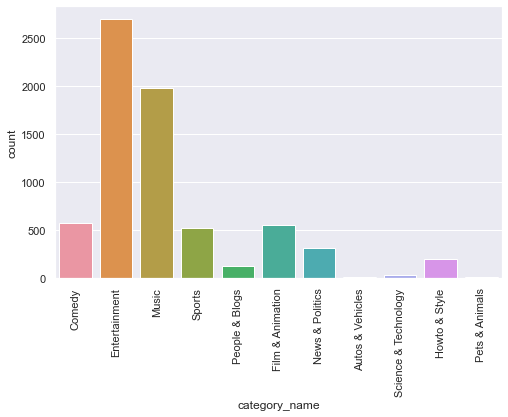

In [72]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(merged_df["category_name"], ax=ax)
plt.xticks(rotation=90)
plt.show();

## What popular videos were removed or had an error and what words do they have in common in their descriptions?

In [73]:
mask_removed = df["video_error_or_removed"] == True
removed_df = df[mask_removed]

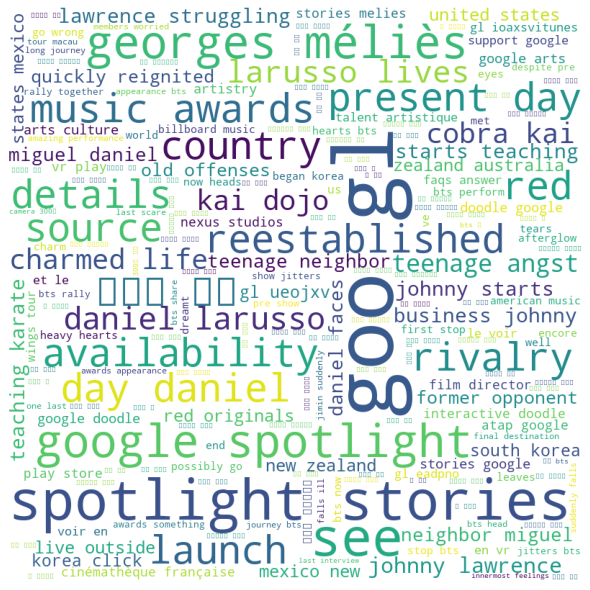

In [74]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(["nhttp", "https", "youtube", "facebook", "bit ly", "smarturl", "co", "uk", "n", "twitter",
                  "nhttps", "instagram", "bit", "ly", "soundcloud", "amzn", "nsubscribe"])
 
# iterate through the dataframe's description
for desc in removed_df["description"]:
     
    # typecaste each description to string
    desc = str(desc)
 
    # split the description into words
    words = desc.split()
     
    # Converts each word into lowercase
    for word in range(len(words)):
        words[word] = words[word].lower()
     
    comment_words += " ".join(words)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Tags

In [75]:
mask = df["category_name"] != "Music"
df_pop = df[mask] 

In [76]:
df_pop = df_pop.sort_values("views", ascending=False).head(50)

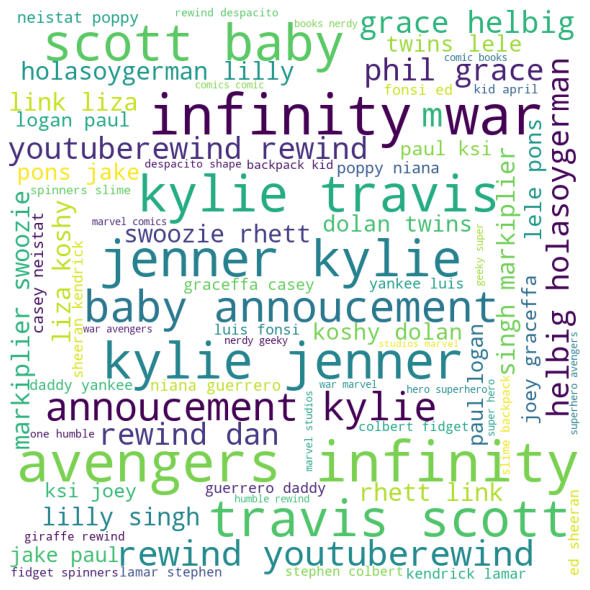

In [77]:
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(["nhttp", "https", "youtube", "facebook", "bit ly", "smarturl", "co", "uk", "n", "twitter",
                  "nhttps", "instagram", "bit", "ly", "soundcloud", "amzn", "nsubscribe"])
 
# iterate through the dataframe's description
for desc in df_pop["tags"]:
     
    # typecaste each description to string
    desc = str(desc)
 
    # split the description into words
    words = desc.split("|")
     
    # Converts each word into lowercase
    for word in range(len(words)):
        words[word] = words[word].lower().replace("\"", "")
     
    comment_words += " ".join(words)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# What video has more than the average number of likes in our dataset?

In [79]:
df_engagement

,likes,dislikes,comment_count,views,category_name,like_rate,dislike_rate,comment_rate,engagement_rate
0,55681,10247,9479,7224515,Howto & Style,0.770723,0.141837,0.131206,1.043766
1,25561,2294,2757,1053632,Entertainment,2.425989,0.217723,0.261666,2.905379
2,787420,43420,125882,17158579,Music,4.589075,0.253051,0.733639,5.575765
3,193,12,37,27833,Sports,0.693421,0.043114,0.132936,0.869471
4,30,2,30,9815,News & Politics,0.305655,0.020377,0.305655,0.631686
...,...,...,...,...,...,...,...,...,...
38911,268088,12783,9933,25066952,Music,1.069488,0.050995,0.039626,1.160109
38912,61998,13781,24330,1492219,Music,4.154752,0.923524,1.630458,6.708734
38913,394830,8892,19988,29641412,Music,1.332022,0.029999,0.067433,1.429453
38914,151870,45875,26766,14317515,Entertainment,1.060729,0.320412,0.186946,1.568086


In [81]:
df_average_likes=df_engagement['likes'].mean()

In [86]:
df_average_likes

134519.55349984582

In [88]:
int(df_average_likes)

134519